In [7]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [8]:
import cv2
import os
import shutil
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

from ultralytics import YOLO

import tensorflow as tf
from tensorflow.keras import *
from tensorflow.keras.applications import EfficientNetB3 ,EfficientNetV2L
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing import *

from sklearn.metrics import f1_score, classification_report

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


E0000 00:00:1746884917.963464      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746884918.019392      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
yaml_content = """train: /kaggle/input/rdd-2022/RDD_SPLIT/train/images
val: /kaggle/input/rdd-2022/RDD_SPLIT/val/images
test: /kaggle/input/rdd-2022/RDD_SPLIT/test/images

nc: 5
names: ['longitudinal_crack', 'transverse_crack', 'alligator_crack', 'pothole', 'other_damage']
"""

file_path = "/kaggle/working/yamal_file.yaml"

with open(file_path, "w") as f:
    f.write(yaml_content)

print(f"YAML file saved at {file_path}")

In [ ]:
yolo_model = YOLO("yolov8n.pt")

yolo_model.train(data = file_path, epochs = 25 , imgsz = 640 , batch = 8 , save_period = 5)

100%|██████████| 6.25M/6.25M [00:00<00:00, 83.8MB/s]


Ultralytics 8.3.130 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/yamal_file.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrain

100%|██████████| 755k/755k [00:00<00:00, 16.7MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 73.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.9±1.2 ms, read: 16.8±2.2 MB/s, size: 68.3 KB)


train: Scanning /kaggle/input/rdd-2022/RDD_SPLIT/train/labels... 26869 images, 8097 backgrounds, 0 corrupt: 100%|██████████| 26869/26869 [01:48<00:00, 246.55it/s]

train: /kaggle/input/rdd-2022/RDD_SPLIT/train/images/Japan_006916.jpg: 1 duplicate labels removed
train: /kaggle/input/rdd-2022/RDD_SPLIT/train/images/Japan_011427.jpg: 1 duplicate labels removed


WARNING ⚠️ train: Cache directory /kaggle/input/rdd-2022/RDD_SPLIT/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 42.0±32.3 MB/s, size: 559.7 KB)


val: Scanning /kaggle/input/rdd-2022/RDD_SPLIT/val/labels... 5758 images, 1837 backgrounds, 0 corrupt: 100%|██████████| 5758/5758 [00:26<00:00, 214.87it/s]

val: /kaggle/input/rdd-2022/RDD_SPLIT/val/images/Japan_006536.jpg: 1 duplicate labels removed


WARNING ⚠️ val: Cache directory /kaggle/input/rdd-2022/RDD_SPLIT/val is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      1.12G      2.045      3.837      1.783         18        640: 100%|██████████| 3359/3359 [07:13<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:05<00:00,  5.50it/s]


                   all       5758       9740      0.292      0.248      0.177     0.0753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      1.41G      2.015      2.974      1.745         27        640: 100%|██████████| 3359/3359 [07:07<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:02<00:00,  5.75it/s]


                   all       5758       9740      0.335       0.29      0.225     0.0985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      1.41G      2.079      2.814      1.822         22        640: 100%|██████████| 3359/3359 [07:15<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:04<00:00,  5.58it/s]


                   all       5758       9740      0.265      0.243      0.182     0.0757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      1.41G      2.086      2.763      1.845         11        640: 100%|██████████| 3359/3359 [07:09<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:01<00:00,  5.81it/s]


                   all       5758       9740       0.35        0.3      0.251      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      1.41G      2.003      2.608      1.795         18        640: 100%|██████████| 3359/3359 [07:19<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:02<00:00,  5.76it/s]


                   all       5758       9740      0.376      0.331      0.283       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      1.41G      1.954      2.488      1.756         23        640: 100%|██████████| 3359/3359 [07:08<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:02<00:00,  5.78it/s]


                   all       5758       9740      0.381      0.357      0.305       0.14

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      1.41G      1.913      2.401      1.718         10        640: 100%|██████████| 3359/3359 [07:13<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:01<00:00,  5.85it/s]


                   all       5758       9740      0.454      0.375      0.356       0.17

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      1.41G      1.887      2.345      1.702         16        640: 100%|██████████| 3359/3359 [07:16<00:00,  7.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:02<00:00,  5.80it/s]


                   all       5758       9740      0.453      0.389      0.365      0.177

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      1.41G      1.858      2.292      1.675         16        640: 100%|██████████| 3359/3359 [07:01<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:03<00:00,  5.71it/s]


                   all       5758       9740      0.474      0.405      0.391       0.19

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      1.41G      1.832      2.242      1.657         16        640: 100%|██████████| 3359/3359 [07:12<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:02<00:00,  5.78it/s]


                   all       5758       9740      0.478      0.415      0.407      0.202

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      1.41G      1.819      2.202      1.642          4        640: 100%|██████████| 3359/3359 [07:22<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:03<00:00,  5.71it/s]


                   all       5758       9740      0.483      0.426      0.421       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      1.41G      1.802      2.162      1.623          2        640: 100%|██████████| 3359/3359 [07:38<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:02<00:00,  5.75it/s]


                   all       5758       9740       0.49      0.442      0.426      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      1.41G       1.78       2.13      1.607         25        640: 100%|██████████| 3359/3359 [07:38<00:00,  7.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:09<00:00,  5.17it/s]


                   all       5758       9740      0.513      0.446      0.446      0.227

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      1.41G      1.771      2.086      1.597         12        640: 100%|██████████| 3359/3359 [08:08<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:09<00:00,  5.18it/s]


                   all       5758       9740      0.516      0.454      0.457      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      1.41G      1.759      2.066      1.585         20        640: 100%|██████████| 3359/3359 [08:02<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:08<00:00,  5.27it/s]


                   all       5758       9740      0.535      0.457      0.467      0.241
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      1.41G      1.755      1.991      1.624         14        640: 100%|██████████| 3359/3359 [07:16<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:06<00:00,  5.38it/s]


                   all       5758       9740       0.53      0.465      0.474      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      1.41G      1.735      1.958      1.617          2        640: 100%|██████████| 3359/3359 [07:17<00:00,  7.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:07<00:00,  5.37it/s]


                   all       5758       9740      0.542       0.47      0.484      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      1.41G      1.714      1.912      1.596          4        640: 100%|██████████| 3359/3359 [06:35<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:02<00:00,  5.76it/s]


                   all       5758       9740      0.558      0.472      0.495      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      1.41G      1.698      1.873       1.58         13        640: 100%|██████████| 3359/3359 [06:25<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:02<00:00,  5.80it/s]


                   all       5758       9740      0.556      0.488      0.504      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      1.41G      1.684      1.841      1.569          4        640: 100%|██████████| 3359/3359 [06:23<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:00<00:00,  5.92it/s]


                   all       5758       9740      0.561       0.49      0.509      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      1.41G      1.666      1.801      1.557          6        640: 100%|██████████| 3359/3359 [06:27<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:01<00:00,  5.81it/s]


                   all       5758       9740      0.562       0.49      0.514      0.271

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      1.41G      1.652      1.771      1.541          5        640: 100%|██████████| 3359/3359 [06:25<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:01<00:00,  5.87it/s]


                   all       5758       9740      0.571       0.49      0.517      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      1.41G      1.636      1.749      1.536          9        640: 100%|██████████| 3359/3359 [06:24<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 360/360 [01:01<00:00,  5.89it/s]


                   all       5758       9740       0.58      0.492      0.522      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      1.41G      1.625       1.73      1.536         19        640:  16%|█▌        | 545/3359 [01:02<06:25,  7.30it/s]

In [5]:
yolo_model.train(data = file_path, epochs = 15 , imgsz = 960 , batch = 8 , save_period = 5)

Training YOLOv8 Model...
Epoch 1/15 [100%] Training...

NameError: name 'epoch_duration' is not defined

In [ ]:
yolo_model.train(data = file_path, epochs = 10 , imgsz = 1280 , batch = 8 , save_period = 5)

In [10]:
yolo_model = YOLO("/kaggle/input/d/aadhamashraf/rdd-2022/RDD 2022.pt")

In [11]:
test_dir = '/kaggle/input/rdd-2022/RDD_SPLIT/test/images'
all_images = sorted([os.path.join(test_dir, f) for f in os.listdir(test_dir) if f.endswith(('.jpg', '.png', '.jpeg'))])

subset_images = all_images[:5]
results = yolo_model.predict(source=subset_images, imgsz=640, conf=0.25, save=True)


0: 640x640 1 transverse_crack, 7.5ms
1: 640x640 1 longitudinal_crack, 1 transverse_crack, 7.5ms
2: 640x640 1 longitudinal_crack, 1 transverse_crack, 7.5ms
3: 640x640 1 longitudinal_crack, 7.5ms
4: 640x640 (no detections), 7.5ms
Speed: 6.4ms preprocess, 7.5ms inference, 59.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


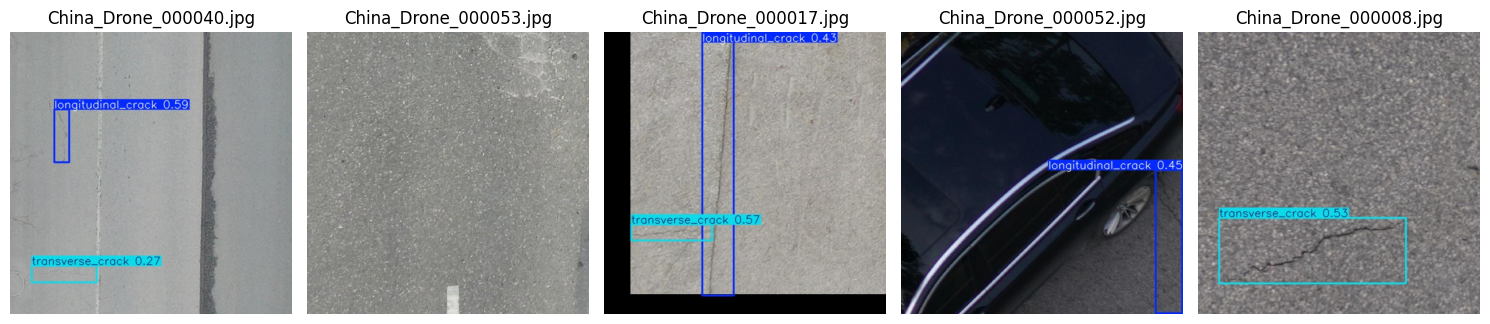

In [15]:
pred_dir = 'runs/detect/predict'
pred_images = os.listdir(pred_dir)

plt.figure(figsize=(15, 8))
for i, img_name in enumerate(pred_images[:5]):
    img = cv2.imread(os.path.join(pred_dir, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(img_name)
plt.tight_layout()
plt.show()